In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score as ss
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('classic')
%matplotlib inline

In [2]:
def comb(dicsh,names,d={},l=[],i=0):
  if i==0:
    l=[]
    d={}
  for j in range(len(dicsh[names[i]])):
    if (i==(len(names)-1)):
      d[names[i]] = dicsh[names[i]][j]
      l.append(d.copy())
    else:
      d[names[i]] = dicsh[names[i]][j]
      l = comb(dicsh,names,d=d,l=l,i=i+1)
    if j==len(dicsh[names[i]])-1:
      return l.copy()


Data and labels

data1


Text(0, 0.5, 'y')

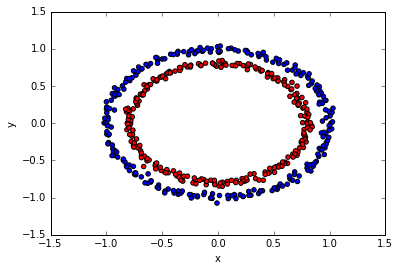

In [3]:
print('data1')
data1,label = make_circles(500,random_state=1,noise=0.025)
plt.scatter(data1[:,0], data1[:, 1],cmap=plt.get_cmap('bwr'), c=label)
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
print('data2')
data2 = load_iris()
d = data2['data']
cl = data2['target']

n1 = int(input('first coordinate = '))
n2 = int(input('second coordinate = '))

plt.scatter(d[:,n1], d[:, n2], cmap=plt.get_cmap('bwr'), c=cl)
plt.xlabel(data2['feature_names'][n1])
plt.ylabel(data2['feature_names'][n2])

Compression with PCA:

data2
silhouette_score =  0.5543236611296415
adjusted_rand_score =  0.7311985567707746
adjusted_mutual_info_score =  0.7671669615713113


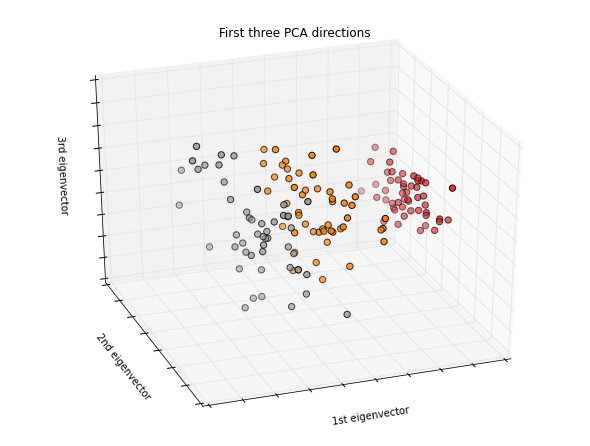

In [21]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
print('data2')
data2 = load_iris()
d = data2['data']
cl = data2['target']
X_reduced = PCA(n_components=3).fit_transform(d)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=cl,
    cmap=plt.cm.Set1,
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

y_pr = Birch(n_clusters=3,threshold=0.).fit_predict(d)
sc = ss(d, y_pr)
ari = adjusted_rand_score(cl, y_pr)
ami = adjusted_mutual_info_score(cl, y_pr)

print('silhouette_score = ',sc)
print('adjusted_rand_score = ',ari)
print('adjusted_mutual_info_score = ',ami)

Algo - Birch

data1


Text(0, 0.5, 'y')

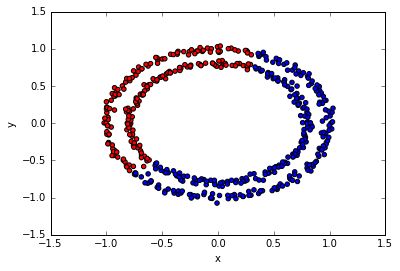

In [5]:
print('data1')
model = Birch(n_clusters=2,threshold=0.001)
y_pr = model.fit_predict(data1)
plt.scatter(data1[:,0], data1[:, 1],cmap=plt.get_cmap('bwr'), c=y_pr)
plt.xlabel('x')
plt.ylabel('y')

In [6]:
def bst_cls(data,di):
  ld = []
  nam = list(di.keys())
  for i in di['n_clusters']:
    f = {'n_clusters': [i], 'threshold': di['threshold']}
    li = comb(f, nam)
    ld.append(li.copy())

  s = []
  sp =[]

  for l in ld:
    sc = []
    for i in l:
      model = Birch(**i)
      y_pr = model.fit_predict(data)
      sc.append(ss(data, y_pr))
    sc = np.array(sc)
    n = sc.argmax()
    s.append(sc[n]) #list of ss coef
    sp.append(l[n]) #list of best param

  s = np.array(s)
  n = s.argmax()
  return s, n, sp

In [7]:
print('data1: gridresearch')
di1 = {'n_clusters':[2,3,4,5], 'threshold':[0.1,0.3,0.05,0.2,0.03]}
s1, n1, sp1 = bst_cls(data1,di1)

data1: gridresearch


best parameters:
{'n_clusters': 4, 'threshold': 0.1}


Text(0, 0.5, 'y')

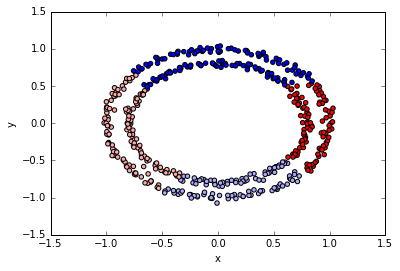

In [8]:
print('best parameters:')
print(sp1[n1])
model = Birch(**sp1[n1])
y_pr = model.fit_predict(data1)
plt.scatter(data1[:,0], data1[:, 1],cmap=plt.get_cmap('bwr'), c=y_pr)
plt.xlabel('x')
plt.ylabel('y')

data1: Estimated number of clusters(elbow method)


Text(0, 0.5, 'silhouette_score')

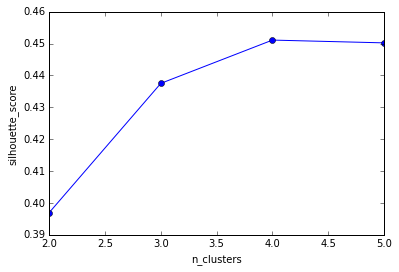

In [9]:
print('data1: Estimated number of clusters(elbow method)')

plt.plot(di1['n_clusters'], s1, marker='o')
plt.xlabel('n_clusters')
plt.ylabel('silhouette_score')



In [10]:
print('data2: gridresearch')
di2 = {'n_clusters':[2,3,4,5], 'threshold':[0.1,0.3,0.05,0.2,0.03]}
s2, n2, sp2 = bst_cls(d,di2)
  

data2: gridresearch


best parameters:
{'n_clusters': 2, 'threshold': 0.1}


[]

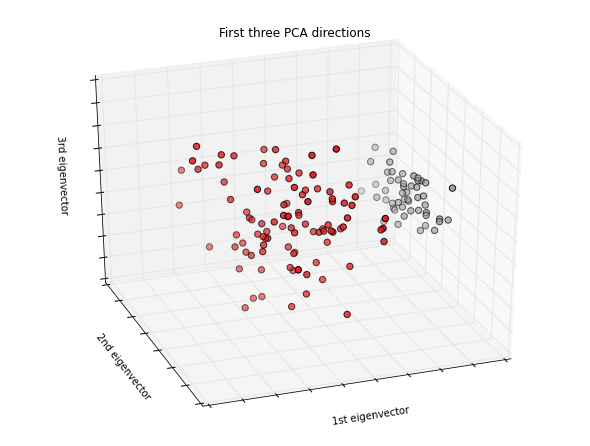

In [11]:
print('best parameters:')
print(sp2[n2])
model = Birch(**sp2[n2])
y_pr = model.fit_predict(d)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(d)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_pr,
    cmap=plt.cm.Set1,
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

data2: Estimated number of clusters(elbow method)


Text(0, 0.5, 'silhouette_score')

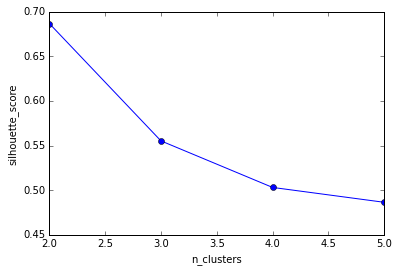

In [12]:
print('data2: Estimated number of clusters(elbow method)')

plt.plot(di2['n_clusters'], s2, marker='o')
plt.xlabel('n_clusters')
plt.ylabel('silhouette_score')

Metrics

In [13]:
print('data1')
model = Birch(**sp1[n1])
y_pr = model.fit_predict(data1)

sc = ss(data1, y_pr)
ari = adjusted_rand_score(label, y_pr)
ami = adjusted_mutual_info_score(label, y_pr)

print('silhouette_score = ',sc)
print('adjusted_rand_score = ',ari)
print('adjusted_mutual_info_score = ',ami)

data1
silhouette_score =  0.4510948209317104
adjusted_rand_score =  -0.002912030269575056
adjusted_mutual_info_score =  -0.002846352974280348


In [14]:
print('data2')
model = Birch(**sp2[n2])
y_pr = model.fit_predict(d)

sc = ss(d, y_pr)
ari = adjusted_rand_score(cl, y_pr)
ami = adjusted_mutual_info_score(cl, y_pr)

print('silhouette_score = ',sc)
print('adjusted_rand_score = ',ari)
print('adjusted_mutual_info_score = ',ami)

data2
silhouette_score =  0.6867350732769776
adjusted_rand_score =  0.5681159420289855
adjusted_mutual_info_score =  0.7315847607219575


Стабільність розбиття

data1
best parameters:
{'n_clusters': 4, 'threshold': 0.3}
coef of siluete:  [0.39345852 0.45182197 0.45989116 0.43325061]
list of parameters:  [{'n_clusters': 2, 'threshold': 0.3}, {'n_clusters': 3, 'threshold': 0.2}, {'n_clusters': 4, 'threshold': 0.3}, {'n_clusters': 5, 'threshold': 0.2}]


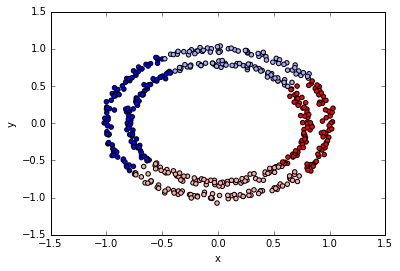

In [15]:
print('data1')
data1_new = data1.copy()
np.random.shuffle(data1_new)

di1 = {'n_clusters':[2,3,4,5], 'threshold':[0.1,0.3,0.05,0.2,0.03]}
s1, n1, sp1 = bst_cls(data1_new,di1)
print('best parameters:')
print(sp1[n1])
model = Birch(**sp1[n1])
y_pr = model.fit_predict(data1_new)
plt.scatter(data1_new[:,0], data1_new[:, 1],cmap=plt.get_cmap('bwr'), c=y_pr)
plt.xlabel('x')
plt.ylabel('y')
print('coef of siluete: ',s1)
print('list of parameters: ',sp1)

data2
best parameters:
{'n_clusters': 2, 'threshold': 0.1}
coef of siluete:  [0.68673507 0.55530626 0.50317191 0.48438259]
list of parameters:  [{'n_clusters': 2, 'threshold': 0.1}, {'n_clusters': 3, 'threshold': 0.3}, {'n_clusters': 4, 'threshold': 0.1}, {'n_clusters': 5, 'threshold': 0.03}]


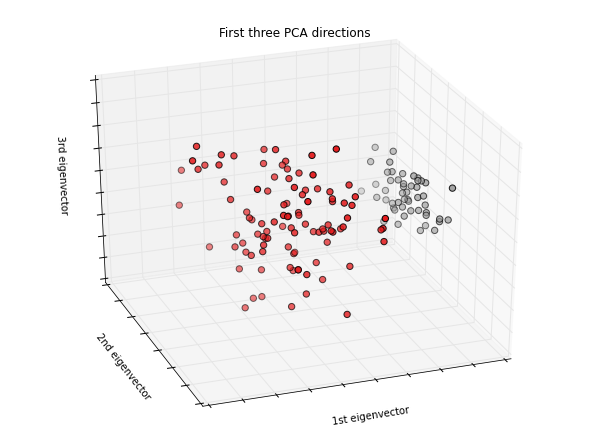

In [16]:
print('data2')
d_new = d.copy()
np.random.shuffle(d_new)

di2 = {'n_clusters':[2,3,4,5], 'threshold':[0.1,0.3,0.05,0.2,0.03]}
s2, n2, sp2 = bst_cls(d_new,di2)

print('best parameters:')
print(sp2[n2])
model = Birch(**sp2[n2])
y_pr = model.fit_predict(d_new)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(d_new)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_pr,
    cmap=plt.cm.Set1,
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
print('coef of siluete: ',s2)
print('list of parameters: ',sp2)

In [20]:
y_pr = Birch(n_clusters=3,threshold=0.).fit_predict(d_new)
sc = ss(d, y_pr)
ari = adjusted_rand_score(cl, y_pr)
ami = adjusted_mutual_info_score(cl, y_pr)

print('silhouette_score = ',sc)
print('adjusted_rand_score = ',ari)
print('adjusted_mutual_info_score = ',ami)

silhouette_score =  -0.04359630186553299
adjusted_rand_score =  -0.007405472386885026
adjusted_mutual_info_score =  -0.007937602489395386


Conclusion : Згідно метрик якості робимо висновок, що перший набір через свою незвичну для цього алгоритму форму погано кластеризується, а другий - досить добре по усім метрикам(хоча справжня кількість кластерів не була виявлена - видно, що можливо допускається не єдина оптимальна кластеризація).

Стабільність розбиття: Із результатів вищенаведеного коду можна стверджувати, що розбиття за алгоритмом Birch є стабільними для обох наборів даних, так як суто візуально отримані кластери особливо не відрізняються (і до того ж їх кількість не змінюється після зміни порядку об'єктів у множині), найкращі параметри для кластеризації та відповідні коефіцієнти силуету також майже не змінюються.

Алгоритм Birch: 
1. Будується так зване CF дерево, де кожен вузол є набором підкластерів, який вказує на свій дочірній вузол(якщо цей підкластер не знаходиться у листовому вузлі), кожному підкластеру відповідає своя CF-функція - вектор, який = (к-сть точок, сумма координат точок, сумма квадратів точок). 
2. Алгоритм проходить через набір точок тільки один раз (це одна з його переваг), кожна нова точка починаючи з вершини дерева заноситься до того підкластеру, з яким радіус новоутвореного кластера буде найменшим серед інших підкластерів цього вузла, далі опускається до дочірнього вузла вибраного підкластеру і т.д. до листового вузла (на цьому шляху CF-функція кожного вибраного кластеру оновлюється).
3. Якщо ж у листовому вузлі за рахунок обмежень щодо радіусу підкластеру точка не належить жодному підкластеру, то для неї створюється новий пілкластер у цьому вузлі, якщо ж через обмеження (у вигляді параметрів алгоритму) місця нема, то даний вузол розділяється на два по критерію відстані - теж саме відбувається у батьківському підкластері і далі аналогічно рекурсивним чином так йдемо до корня.
4. Коли дерево утворено - розглядаються усі підкластери листових узлів, найближчі з них об'єднуються щоб дотриматись умови необхідної кількості кластерів.

Метрики якості:
1. silhouette_score(для певного об'єкта) = (b-a)/max(a,b), де a-середня відстань від даного об'єкта до інших об'єктів його ж кластеру, b-середня відстань від даного об'єкта до об'єктів іншого найближчого кластера, оптимальне значення=макс=1.
2. adjusted_rand_score (для порівняння двох кластерізацій) = (RI - Expected_RI) / (max(RI) - Expected_RI), де RI (rand_index) = (a+b)/(count of all pairs), a-кількість пар, які класифіковані до одного кластеру згідно двох типів кластерізацій, b-кількість пар, які класифіковані до різних кластерів згідно двох типів кластерізацій.
3. AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [avg(H(U), H(V)) - E(MI(U, V))], MI(U, V)=вимірює наскільки близькі степені однорідності двох кластерізацій(макс коли вони ідентичні), при цьому ця величина завжди менше ніж max(H(U), H(V)) (ентропія відповідних кластеризацій). AMI = 0 якщо кластеризація взята випадковим чином(тобто таке значення AMI буде у середньому спостерігатись у підвибірках даного набору даних) і = 1 (в даному випадку десь в околі одиниці) якщо кластеризації ідентичні.  


